In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_hotel=pd.read_csv('hotel_bookings.csv')
df_hotel.shape

(119390, 32)

In [3]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df_hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df_hotel.isnull().sum()/len(df_hotel)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

<Axes: >

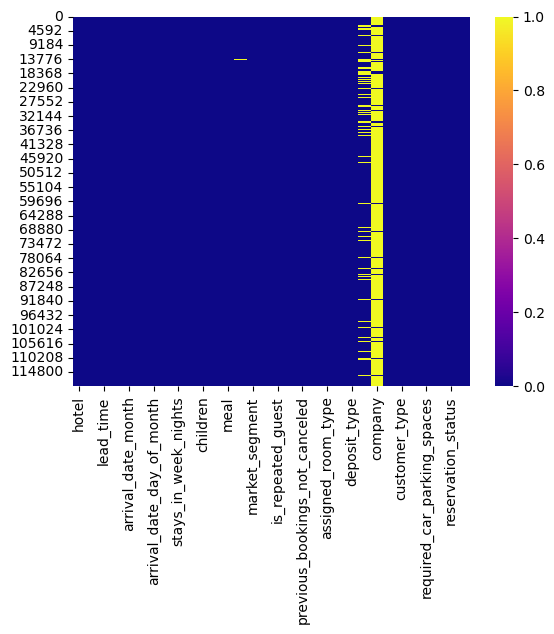

In [7]:
sns.heatmap(df_hotel.isnull(),cmap='plasma')

In [8]:
df_hotel.select_dtypes('number').corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [9]:
len(df_hotel.select_dtypes('number').columns)

20

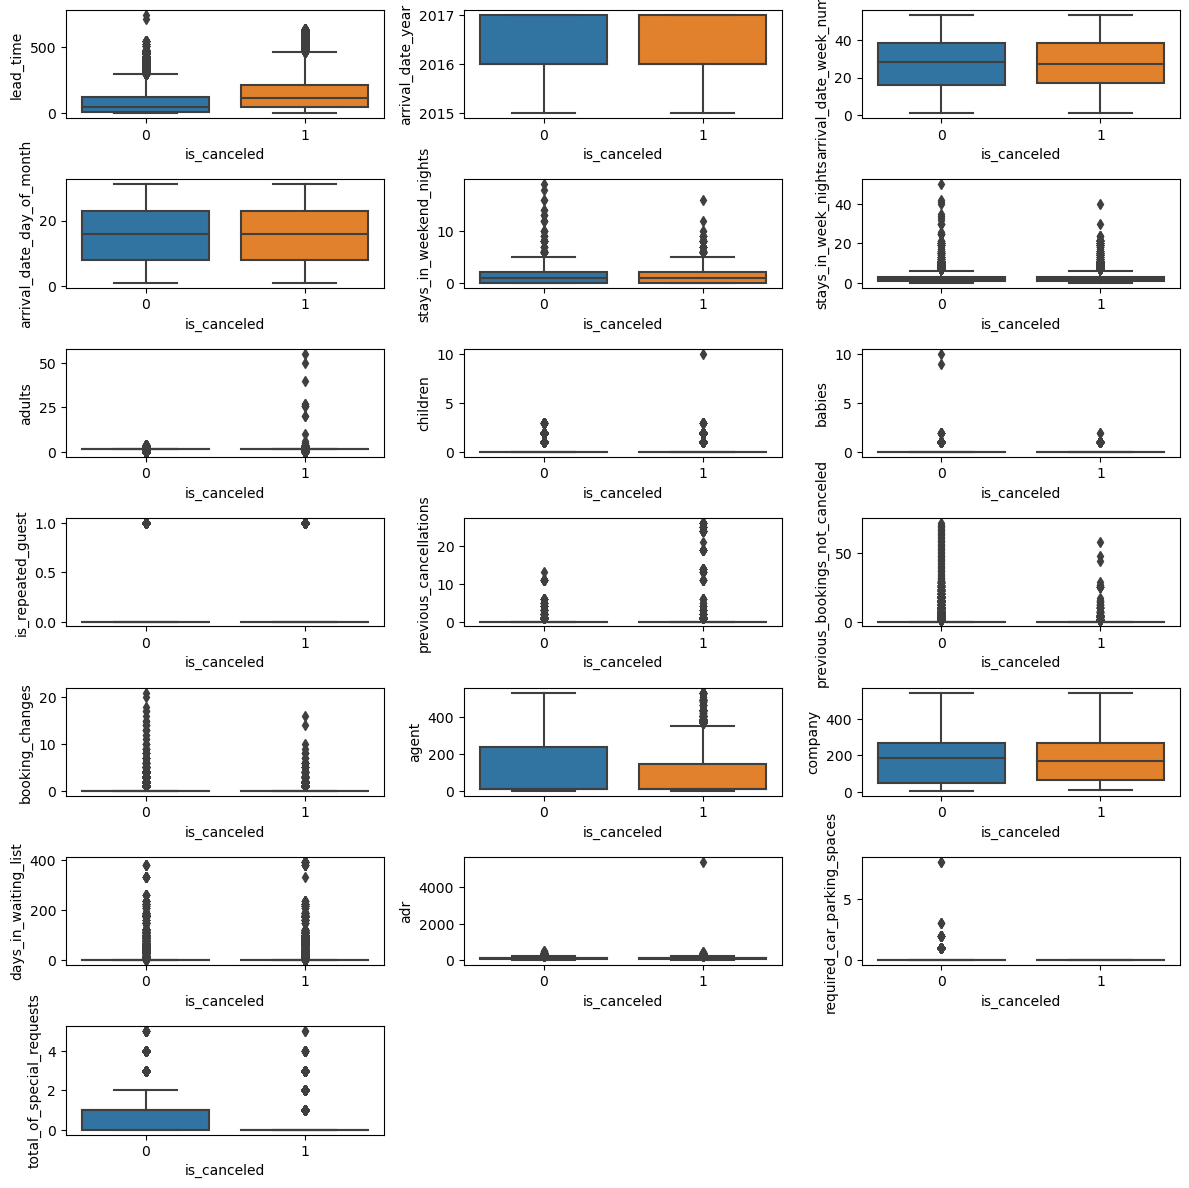

In [10]:
j=1
plt.rcParams["figure.figsize"]=[12,12]
for i in df_hotel.select_dtypes('number').drop('is_canceled',axis=1).columns:
    plt.subplot(7,3,j)
    sns.boxplot(y=df_hotel[i],x=df_hotel['is_canceled'])
    j+=1
    plt.tight_layout()
plt.show()

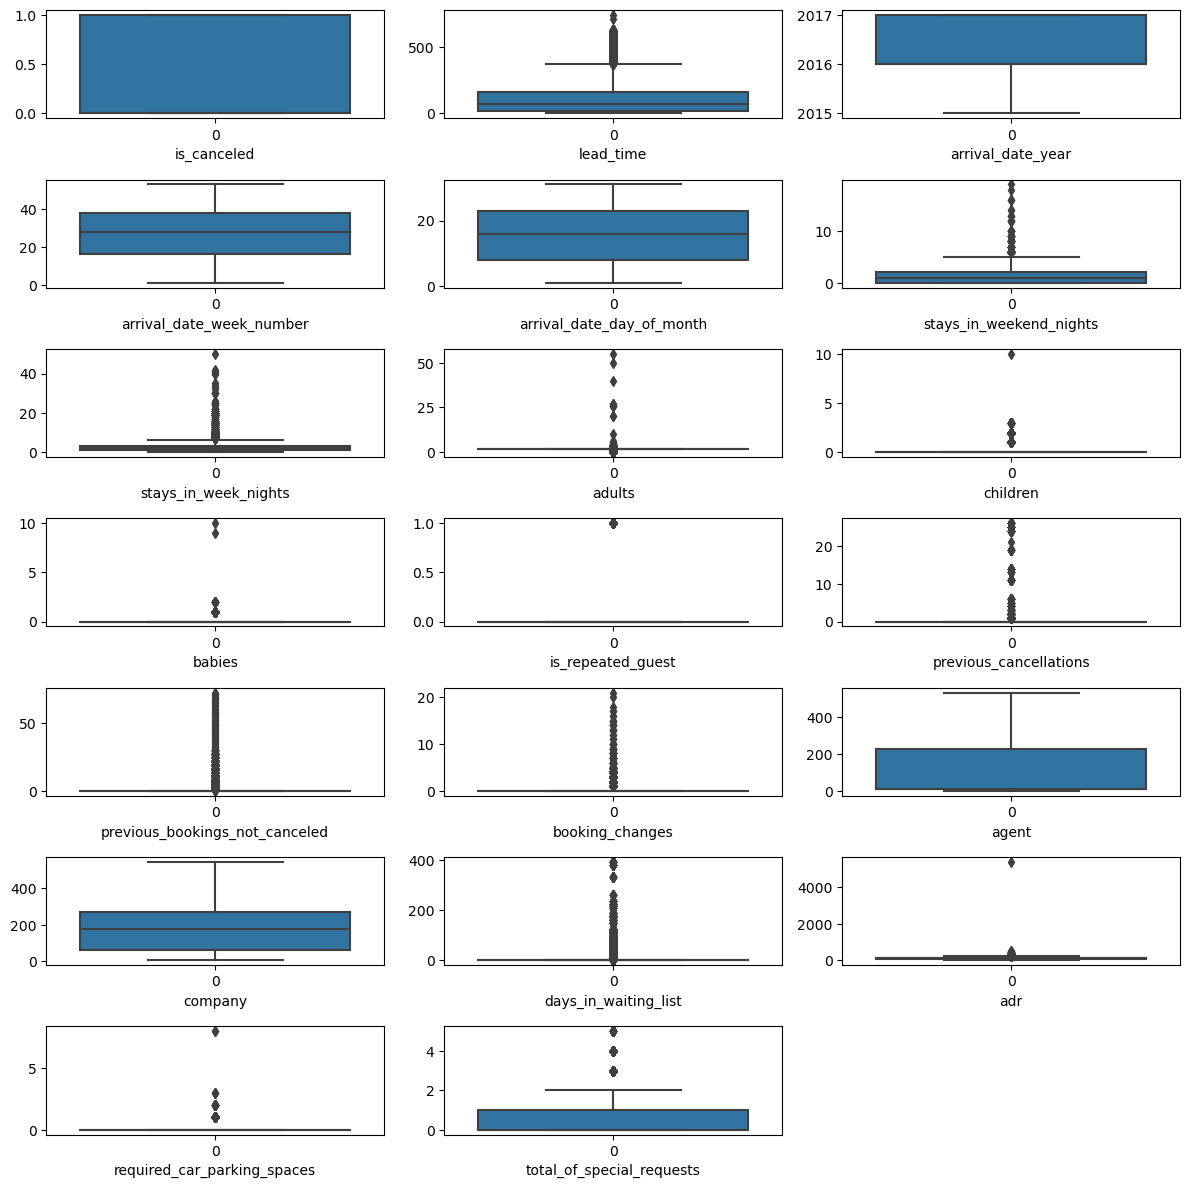

In [11]:
j=1
plt.rcParams["figure.figsize"]=[12,12]
for i in df_hotel.select_dtypes('number').columns:
    plt.subplot(7,3,j)
    sns.boxplot(df_hotel[i])
    plt.xlabel(i)
    j+=1
plt.tight_layout()
plt.show()

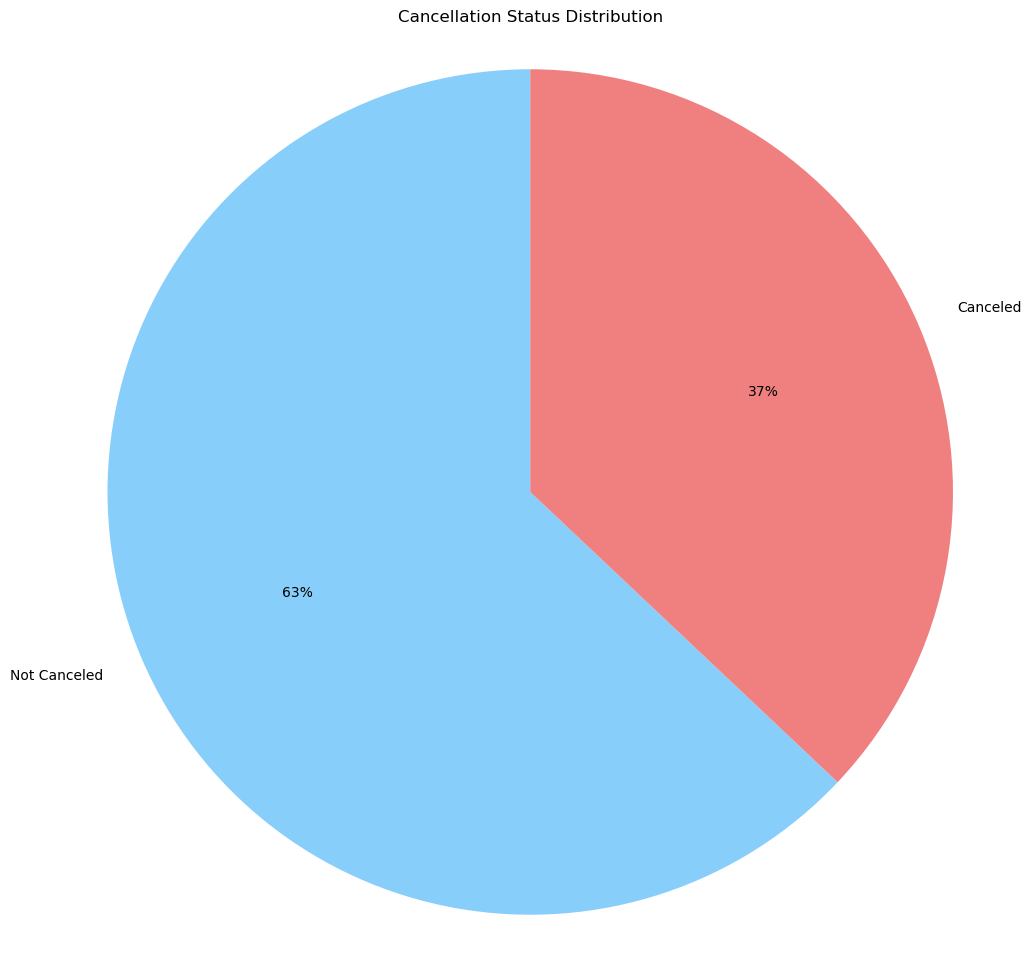

In [12]:

plt.pie(df_hotel['is_canceled'].value_counts(normalize=True)*100,
        labels=['Not Canceled', 'Canceled'],
        autopct='%.f%%',  # This adds percentage values to each slice
        startangle=90,  # Start the first slice at 90 degrees
        colors=['lightskyblue', 'lightcoral'])  # You can customize slice colors here

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Cancellation Status Distribution')
plt.show()


In [13]:
df_hotel.drop('company',axis=1,inplace=True)

In [14]:
from sklearn.impute import KNNImputer

In [15]:
df_hotel.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [16]:
df_hotel.select_dtypes('object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [17]:
for i in df_hotel.columns:
    print(i)
    print(df_hotel[i].unique())
    print('---------------------------------------------------------------------------------------------')

hotel
['Resort Hotel' 'City Hotel']
---------------------------------------------------------------------------------------------
is_canceled
[0 1]
---------------------------------------------------------------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 3

In [18]:
df_hotel[df_hotel.duplicated()==True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [19]:
df_hotel=df_hotel.drop_duplicates()

In [20]:
imputer = KNNImputer(n_neighbors=10)

# Fit and transform the data
df_hotel.agent = imputer.fit_transform(df_hotel[['agent']])

In [21]:
df_hotel['country'].fillna(df_hotel['country'].mode()[0],inplace=True)

In [22]:
df_hotel['children'].fillna(df_hotel['children'].median(),inplace=True)

In [23]:
df_hotel.isnull().sum().sort_values(ascending=False)

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [24]:
df_hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [25]:
q1=df_hotel.select_dtypes('number').quantile(.05)
q3=df_hotel.select_dtypes('number').quantile(.95)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df_hotel=df_hotel[~((df_hotel.select_dtypes('number')>ul)|(df_hotel.select_dtypes('number')<ll)).any(axis=1)]

In [26]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.13863,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.13863,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.00000,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.00000,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,94.13863,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [27]:
df_hotel.shape

(80162, 31)

<Axes: >

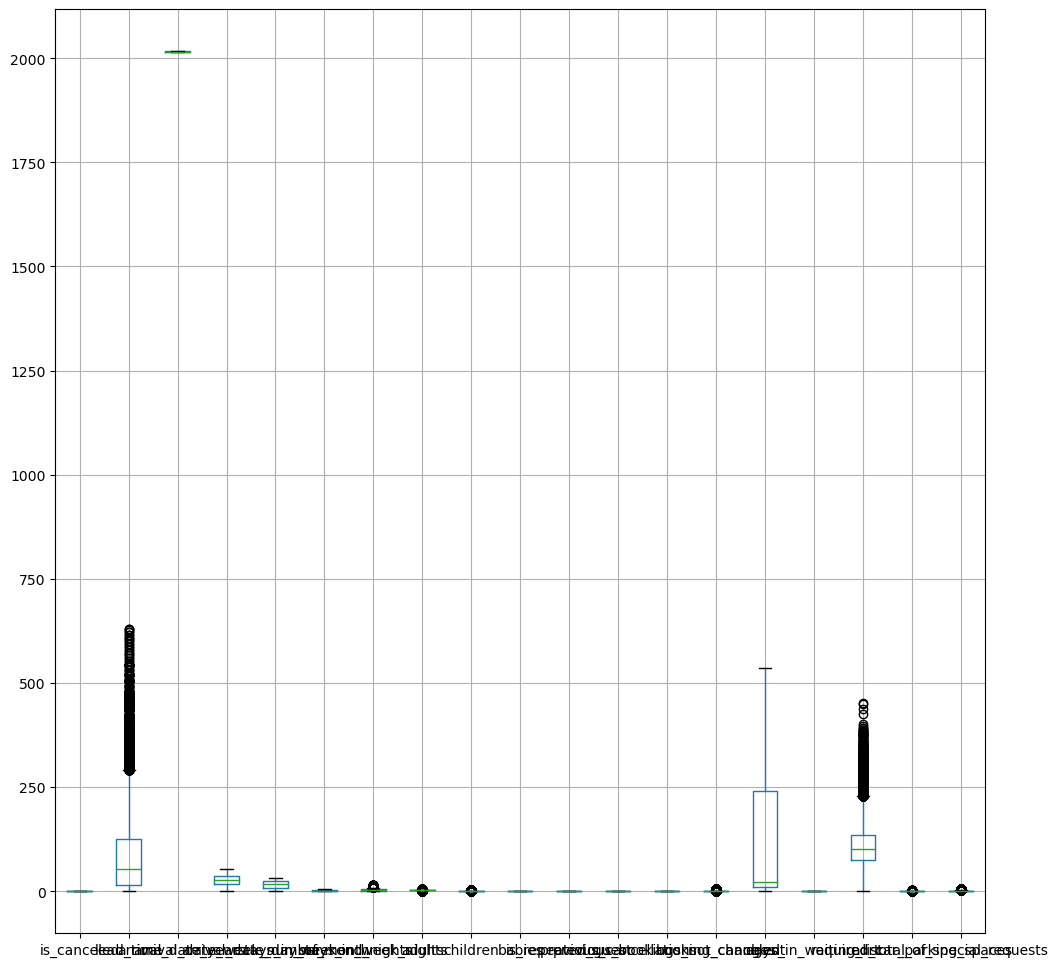

In [28]:
df_hotel.select_dtypes('number').boxplot()

In [29]:
df_hotel.shape

(80162, 31)

In [30]:
len(df_hotel.select_dtypes('number').columns)

19

In [31]:
df_hotel.drop('reservation_status_date',axis=1,inplace=True)

In [32]:
# Define a mapping of country codes to continents
continent_mapping = {'PRT': 'Europe','GBR': 'Europe','USA': 'North America','ESP': 'Europe','IRL': 'Europe','FRA': 'Europe','ROU': 'Europe',
    'NOR': 'Europe','OMN': 'Asia','ARG': 'South America','POL': 'Europe','DEU': 'Europe','BEL': 'Europe','CHE': 'Europe','CN': 'Asia',
    'GRC': 'Europe','ITA': 'Europe','NLD': 'Europe','DNK': 'Europe','RUS': 'Asia','SWE': 'Europe','AUS': 'Australia','EST': 'Europe',
    'CZE': 'Europe','BRA': 'South America','FIN': 'Europe','MOZ': 'Africa','BWA': 'Africa','LUX': 'Europe','SVN': 'Europe','ALB': 'Europe',
    'IND': 'Asia','CHN': 'Asia','MEX': 'North America','MAR': 'Africa','UKR': 'Europe','SMR': 'Europe','LVA': 'Europe','PRI': 'North America',
    'SRB': 'Europe','CHL': 'South America','AUT': 'Europe','BLR': 'Europe','LTU': 'Europe','TUR': 'Asia','ZAF': 'Africa','AGO': 'Africa',
    'ISR': 'Asia','CYM': 'North America','ZMB': 'Africa','CPV': 'Africa','ZWE': 'Africa','DZA': 'Africa','KOR': 'Asia','CRI': 'North America',
    'HUN': 'Europe','ARE': 'Asia','TUN': 'Africa','JAM': 'North America','HRV': 'Europe','HKG': 'Asia','IRN': 'Asia','GEO': 'Asia','AND': 'Europe',
    'GIB': 'Europe','URY': 'South America','JEY': 'Europe','CAF': 'Africa','CYP': 'Europe','COL': 'South America','GGY': 'Europe','KWT': 'Asia',
    'NGA': 'Africa','MDV': 'Asia','VEN': 'South America','SVK': 'Europe','FJI': 'Australia','KAZ': 'Asia','PAK': 'Asia','IDN': 'Asia','LBN': 'Asia',
    'PHL': 'Asia','SEN': 'Africa','SYC': 'Africa','AZE': 'Asia','BHR': 'Asia','NZL': 'Australia','THA': 'Asia','DOM': 'North America','MKD': 'Europe',
    'MYS': 'Asia','ARM': 'Asia','JPN': 'Asia','LKA': 'Asia','CUB': 'North America','CMR': 'Africa','BIH': 'Europe','MUS': 'Africa','COM': 'Africa',
    'SUR': 'South America','UGA': 'Africa','BGR': 'Europe','CIV': 'Africa','JOR': 'Asia','SYR': 'Asia','SGP': 'Asia','BDI': 'Africa','SAU': 'Asia',
    'VNM': 'Asia','PLW': 'Australia','QAT': 'Asia','EGY': 'Africa','PER': 'South America','MLT': 'Europe','MWI': 'Africa','ECU': 'South America',
    'MDG': 'Africa','ISL': 'Europe','UZB': 'Asia','NPL': 'Asia','BHS': 'North America','MAC': 'Asia','TGO': 'Africa','TWN': 'Asia','DJI': 'Africa',
    'STP': 'Africa','KNA': 'North America','ETH': 'Africa','IRQ': 'Asia','HND': 'North America','RWA': 'Africa','KHM': 'Asia','MCO': 'Europe',
    'BGD': 'Asia','IMN': 'Europe','TJK': 'Asia','NIC': 'North America','BEN': 'Africa','VGB': 'North America','TZA': 'Africa','GAB': 'Africa','GHA': 'Africa',
    'TMP': 'Asia','GLP': 'North America','KEN': 'Africa','LIE': 'Europe','GNB': 'Africa','MNE': 'Europe','UMI': 'Australia','MYT': 'Africa','FRO': 'Europe',
    'MMR': 'Asia','PAN': 'North America','BFA': 'Africa','LBY': 'Africa','MLI': 'Africa','NAM': 'Africa','BOL': 'South America','PRY': 'South America',
    'BRB': 'North America','ABW': 'North America','AIA': 'North America','SLV': 'North America','DMA': 'North America','PYF': 'Australia',
    'GUY': 'South America','LCA': 'North America','ATA': 'Antarctica','GTM': 'North America','ASM': 'Australia','MRT': 'Africa','NCL': 'Australia',
    'KIR': 'Australia','SDN': 'Africa','ATF': 'Antarctica','SLE': 'Africa','LAO': 'Asia'
}

# Use the map function to apply the mapping using a lambda function
df_hotel['continents'] = df_hotel['country'].apply(lambda code: continent_mapping.get(code, 'Unknown'))


In [33]:
df_hotel.drop('country',axis=1,inplace=True)

In [34]:
len(df_hotel.select_dtypes('number').columns)

19

In [35]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'continents'],
      dtype='object')

In [36]:
df_hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

In [37]:
df_hotel.select_dtypes('number').std()

is_canceled                         0.447557
lead_time                          84.805456
arrival_date_year                   0.680596
arrival_date_week_number           13.488839
arrival_date_day_of_month           8.832092
stays_in_weekend_nights             0.975613
stays_in_week_nights                1.870649
adults                              0.496296
children                            0.457243
babies                              0.000000
is_repeated_guest                   0.000000
previous_cancellations              0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     0.627572
agent                             106.396575
days_in_waiting_list                0.000000
adr                                51.226580
required_car_parking_spaces         0.271070
total_of_special_requests           0.821982
dtype: float64

In [38]:
df_hotel.drop(['babies','is_repeated_guest','days_in_waiting_list','previous_bookings_not_canceled','previous_cancellations','days_in_waiting_list'],axis=1,inplace=True)

In [39]:
len(df_hotel.select_dtypes('object').columns)

11

In [40]:
df_hotel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,80162,2,City Hotel,49671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,80162.0,NaN,NaN,NaN,0.277076,0.447557,0.0,0.0,0.0,1.0,1.0
lead_time,80162.0,NaN,NaN,NaN,80.916556,84.805456,0.0,14.0,52.0,125.0,629.0
arrival_date_year,80162.0,NaN,NaN,NaN,2016.222949,0.680596,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,80162,12,August,10686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,80162.0,NaN,NaN,NaN,26.838302,13.488839,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,80162.0,NaN,NaN,NaN,15.820376,8.832092,1.0,8.0,16.0,24.0,31.0
stays_in_weekend_nights,80162.0,NaN,NaN,NaN,1.01583,0.975613,0.0,0.0,1.0,2.0,5.0
stays_in_week_nights,80162.0,NaN,NaN,NaN,2.632956,1.870649,0.0,1.0,2.0,4.0,15.0
adults,80162.0,NaN,NaN,NaN,1.900501,0.496296,0.0,2.0,2.0,2.0,6.0


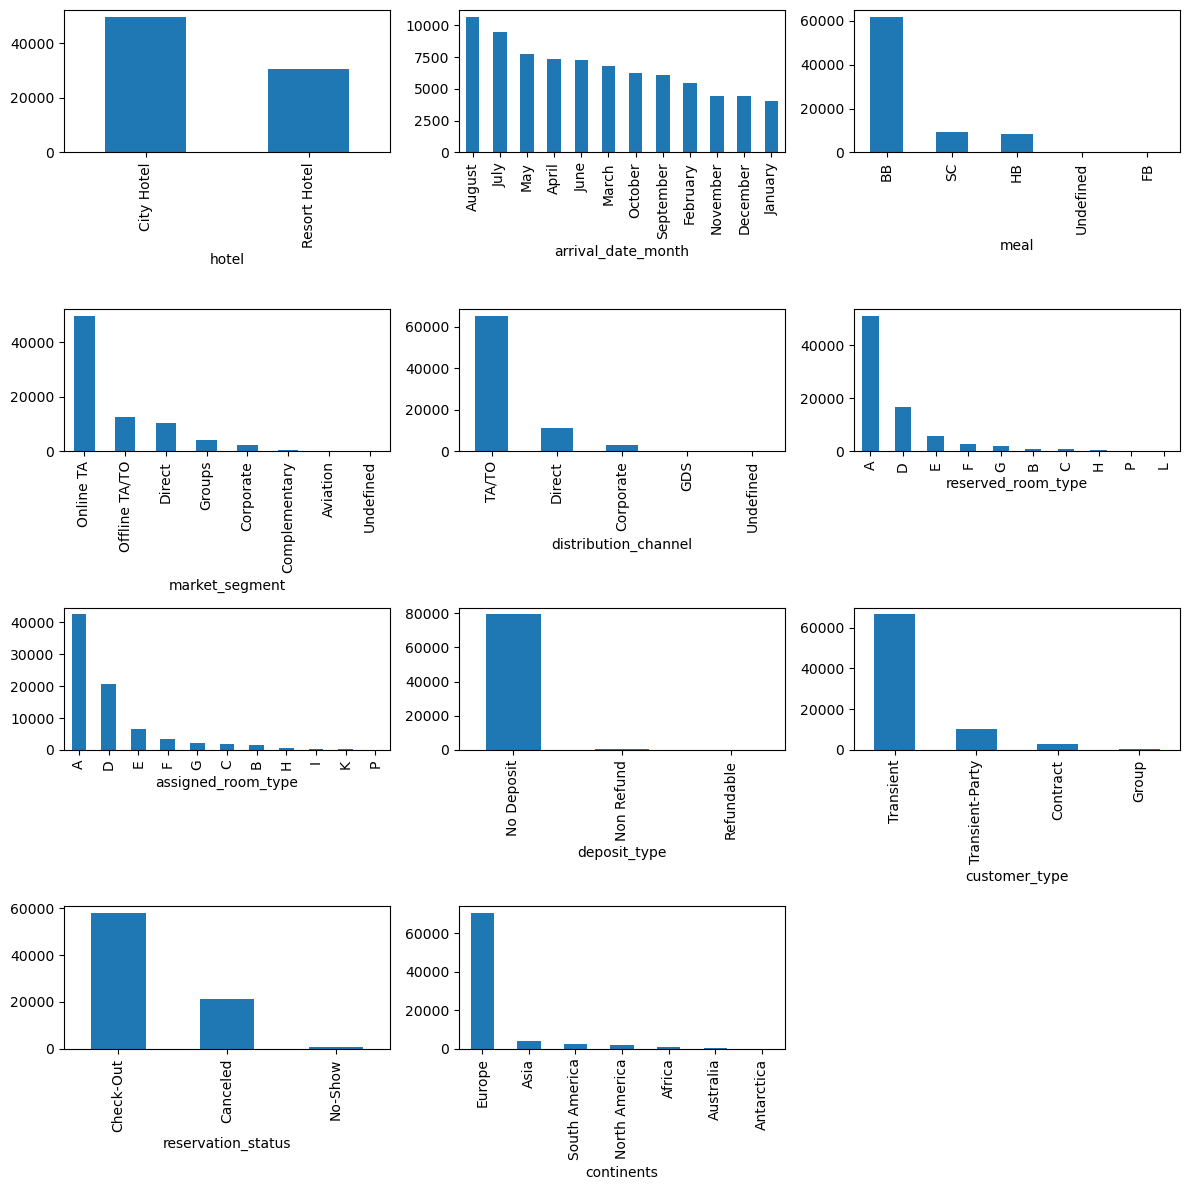

In [41]:
j=1
for i in df_hotel.select_dtypes('object').columns:
    plt.subplot(4,3,j)
    df_hotel[i].value_counts().plot(kind='bar')
    j+=1
    plt.tight_layout()
plt.show()

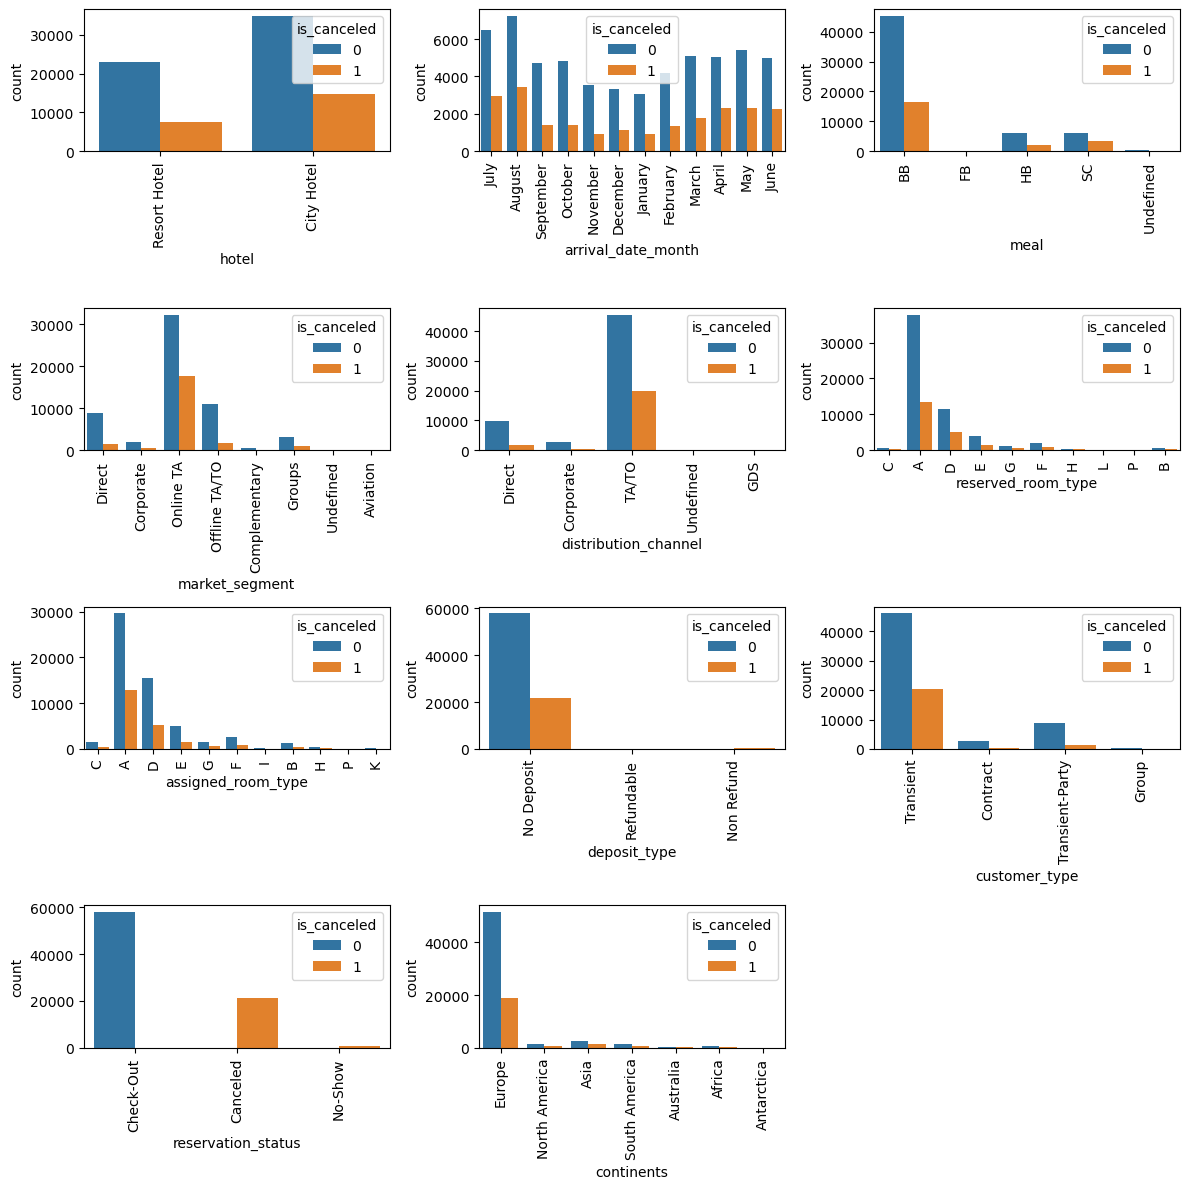

In [42]:
j=1
for i in df_hotel.select_dtypes('object').columns:
    plt.subplot(4,3,j)
    sns.countplot(x=df_hotel[i],hue=df_hotel['is_canceled'])
    j+=1
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

In [43]:
from scipy.stats import chi2_contingency
p_v=[]
for i in df_hotel.select_dtypes('object').columns:
    ct=pd.crosstab(df_hotel[i],df_hotel['is_canceled'])
    if chi2_contingency(ct)[1]>=0.05:
        p_v.append(i)

In [44]:
p_v

[]

In [45]:
iv=[]
from scipy.stats import jarque_bera
from scipy.stats import levene,ttest_ind,mannwhitneyu
for i in df_hotel.select_dtypes('number').drop('is_canceled',axis=1).columns:
    if jarque_bera(df_hotel[i])[1]>0.05:
        if levene(df_hotel[i],df_hotel['is_canceled'])[1]>0.05:
            if ttest_ind(df_hotel[i],df_hotel['is_canceled'])[1]>=0.05:
                iv.append(i)
        else:
            if mannwhitneyu(df_hotel[i],df_hotel['is_canceled'])[1]>=0.05:
                iv.append(i)
    else:
        if mannwhitneyu(df_hotel[i],df_hotel['is_canceled'])[1]>=0.05:
            iv.append(i)

In [46]:
iv

[]

<Axes: >

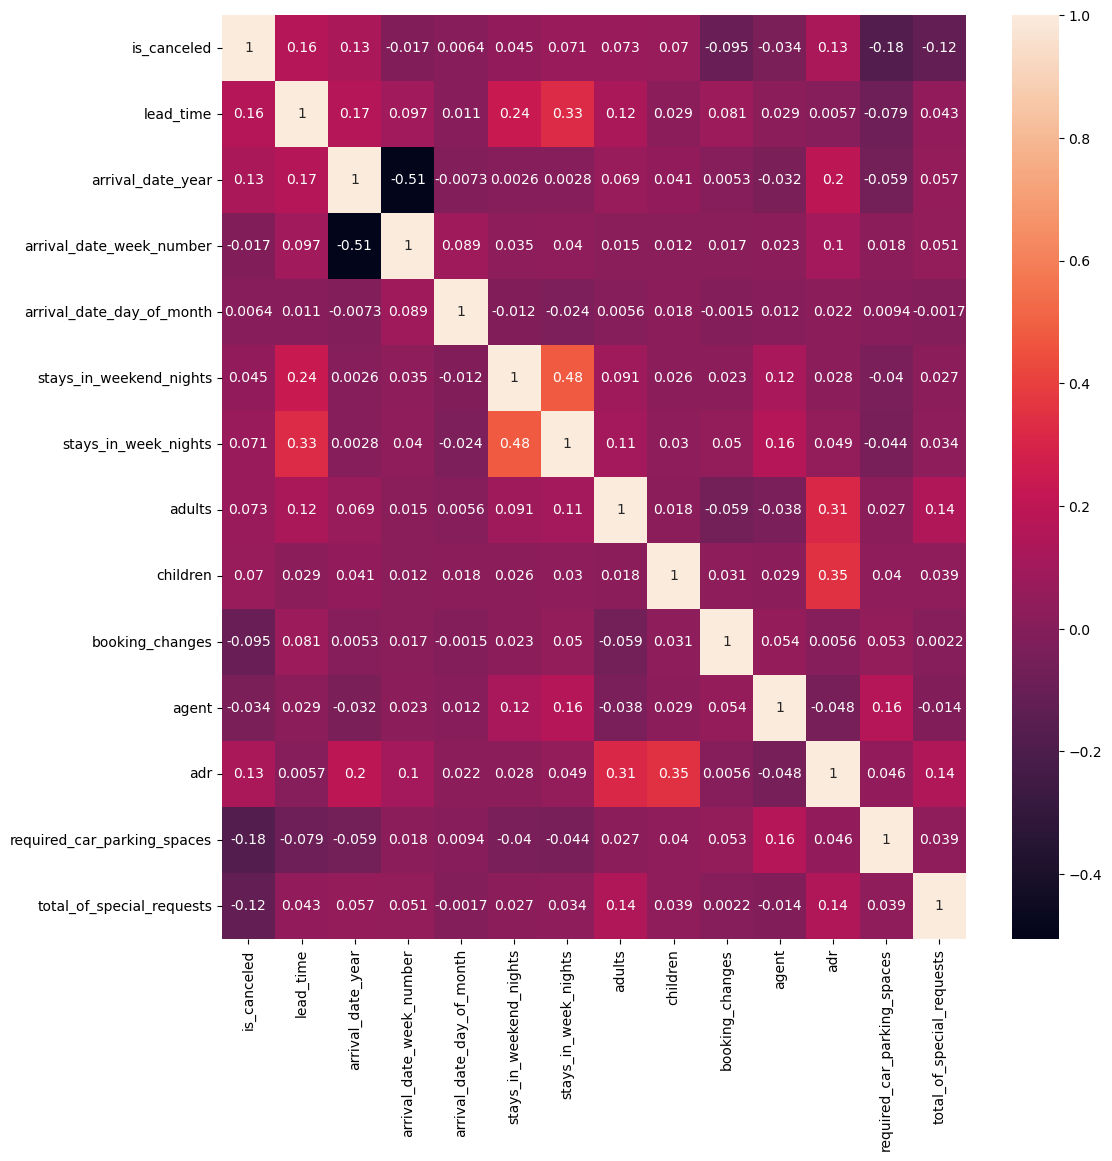

In [47]:
sns.heatmap(df_hotel.select_dtypes('number').corr(),annot=True)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest=train_test_split(df_hotel.drop(['is_canceled','reservation_status'],axis=1),df_hotel['is_canceled'],test_size=.3,random_state=20)

In [49]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
for i in xtrain.select_dtypes('number').columns:
    xtrain[i]= rs.fit_transform(xtrain[[i]])
    xtest[i]= rs.transform(xtest[[i]])

In [50]:
len(xtrain.columns),len(xtest.columns)

(23, 23)

In [51]:
from sklearn.preprocessing import OrdinalEncoder
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
# Create an instance of OrdinalEncoder with the desired order
encoder = OrdinalEncoder(categories=[month_order])

xtrain['arrival_date_month'] = encoder.fit_transform(xtrain[['arrival_date_month']])
xtest['arrival_date_month'] = encoder.transform(xtest[['arrival_date_month']])

In [52]:
len(xtrain.columns),len(xtest.columns)

(23, 23)

In [53]:
from sklearn.preprocessing import OrdinalEncoder
continent_order = ['Asia', 'Africa', 'North America', 'South America', 'Antarctica', 'Europe', 'Australia']

# Create an instance of OrdinalEncoder with the desired order
encoder = OrdinalEncoder(categories=[continent_order])

# Fit and transform your data
# Replace 'data' with your actual data that contains continent information
xtrain['continents'] = encoder.fit_transform(xtrain[['continents']])
xtest['continents'] = encoder.transform(xtest[['continents']])

In [54]:
from sklearn.preprocessing import OrdinalEncoder
market_segment_order = ['Corporate', 'Groups', 'Online TA', 'Offline TA/TO', 'Direct', 'Complementary', 'Undefined','Aviation']

# Create an instance of OrdinalEncoder with the desired order
encoder = OrdinalEncoder(categories=[market_segment_order])

xtrain['market_segment'] = encoder.fit_transform(xtrain[['market_segment']])
xtest['market_segment'] = encoder.transform(xtest[['market_segment']])

In [55]:
df_cat=xtrain.select_dtypes('object').drop(['assigned_room_type','reserved_room_type'],axis=1)
encoded=pd.get_dummies(df_cat,drop_first=True,dtype='float')
df_cat1=xtest.select_dtypes('object').drop(['assigned_room_type','reserved_room_type'],axis=1)
encoded1=pd.get_dummies(df_cat1,drop_first=True,dtype='float')

In [56]:
xtrain.drop(df_cat,axis=1,inplace=True)

In [57]:
xtest.drop(df_cat1,axis=1,inplace=True)

In [58]:
xtrain=pd.concat([xtrain,encoded],axis=1)

In [59]:
xtest=pd.concat([xtest,encoded1],axis=1)

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in xtrain[['assigned_room_type','reserved_room_type']].columns:
    xtrain[i]=le.fit_transform(np.ravel(xtrain[[i]]))
    xtest[i]=le.fit_transform(np.ravel(xtest[[i]]))

In [61]:
import statsmodels.api as sm
xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)
xtrain_c.columns

Index(['const', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'market_segment', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'continents', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

In [62]:
logreg=sm.Logit(ytrain,xtrain_c).fit()
print(logreg.summary())
# H0: Model is insignificant
# Ha: Model is signficant
# The above hypothesis is for LLr p-value (Log Likelihood Ratio)

         Current function value: 0.480789
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                56113
Model:                          Logit   Df Residuals:                    56080
Method:                           MLE   Df Model:                           32
Date:                Mon, 08 Jan 2024   Pseudo R-squ.:                  0.1879
Time:                        00:32:33   Log-Likelihood:                -26979.
converged:                      False   LL-Null:                       -33219.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.2519      0.667     -3.375      0.001      -3.560      -0.944
lead_

C:\Users\Ankit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
ypred_prob=logreg.predict(xtest_c)

In [64]:
ypred_prob[0:5]

103122    3.227115e-01
72523     3.749076e-01
34672     1.162005e-15
68097     6.520891e-01
39293     1.068022e-01
dtype: float64

In [65]:
ypred=[0 if i<0.5 else 1 for i in ypred_prob]
ypred[0:5]

[0, 0, 0, 1, 0]

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(ytest,ypred_prob)

0.788434571074137


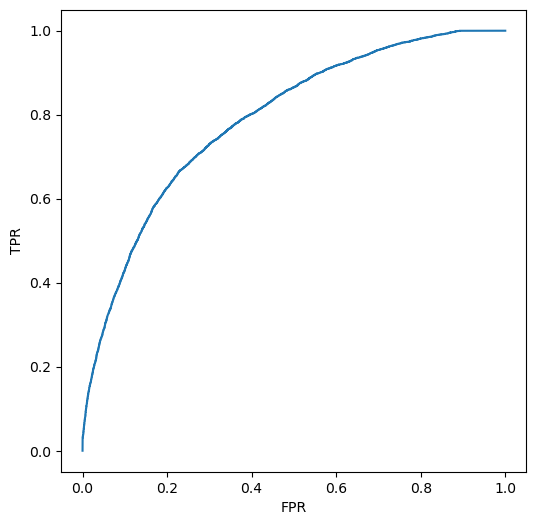

In [67]:
plt.rcParams['figure.figsize']=[6,6]
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print(roc_auc_score(ytest,ypred_prob))
plt.show()

In [68]:
lr=LogisticRegression(max_iter=1000)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [69]:
ypred=lr.predict(xtrain)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     40458
           1       0.68      0.35      0.46     15655

    accuracy                           0.77     56113
   macro avg       0.73      0.64      0.66     56113
weighted avg       0.76      0.77      0.74     56113



In [70]:
ypred_test=lr.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     17493
           1       0.66      0.34      0.45      6556

    accuracy                           0.77     24049
   macro avg       0.72      0.64      0.65     24049
weighted avg       0.75      0.77      0.75     24049



In [71]:
confusion_matrix(ytrain,ypred)

array([[37863,  2595],
       [10212,  5443]], dtype=int64)

In [72]:
cm=confusion_matrix(ytest,ypred_test)
cm

array([[16318,  1175],
       [ 4311,  2245]], dtype=int64)

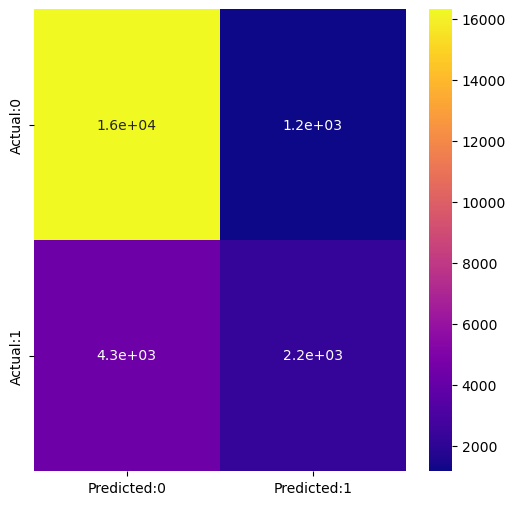

In [73]:
conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
sns.heatmap(conf_matrix,annot=True,cmap="plasma")
plt.show()

In [74]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob)

In [75]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [76]:
from sklearn.metrics import f1_score,recall_score,precision_score
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred,average='micro')
    recall      =recall_score(test,pred,average='micro')
    precision   =precision_score(test,pred,average='micro')
    # aic         =model.aic
    # reliability = cohen_kappa_score(test,pred)
    return (accuracy,recall,precision,f1score)

In [77]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score
    df1=pd.DataFrame({'Model'       : [name],
                                    'Accuracy'    : [per_measures(model,test,pred)[0]],
                                    'Recall'      : [per_measures(model,test,pred)[1]],
                                    'Precision'   : [per_measures(model,test,pred)[2]],
                                    'F1 Score'    : [per_measures(model,test,pred)[3]]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     })

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = pd.concat([df1,perf_score],
                                   ignore_index = True)

In [78]:
update_performance(name="LogisticReg-skl",model=lr,test=ytest,pred=ypred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [81]:
ypred_knn_trn=knn.predict(xtrain.values)
print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.8383262345624009
[[36883  3575]
 [ 5497 10158]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     40458
           1       0.74      0.65      0.69     15655

    accuracy                           0.84     56113
   macro avg       0.80      0.78      0.79     56113
weighted avg       0.83      0.84      0.83     56113



In [82]:
ypred_knn_tst=knn.predict(xtest.values)
print(accuracy_score(ytest,ypred_knn_tst))
print(confusion_matrix(ytest,ypred_knn_tst))
print(classification_report(ytest,ypred_knn_tst))

0.7693459187492203
[[15023  2470]
 [ 3077  3479]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     17493
           1       0.58      0.53      0.56      6556

    accuracy                           0.77     24049
   macro avg       0.71      0.69      0.70     24049
weighted avg       0.76      0.77      0.77     24049



In [83]:
update_performance(name="KNearestNeighbour",model=knn,test=ytest,pred=ypred_knn_tst)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
1,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [84]:
from sklearn.naive_bayes import GaussianNB
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(xtrain, ytrain)
ypred=gnb_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.35      0.50     17493
           1       0.34      0.89      0.49      6556

    accuracy                           0.50     24049
   macro avg       0.62      0.62      0.50     24049
weighted avg       0.74      0.50      0.50     24049



In [85]:
ypred=gnb_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.35      0.50     17493
           1       0.34      0.89      0.49      6556

    accuracy                           0.50     24049
   macro avg       0.62      0.62      0.50     24049
weighted avg       0.74      0.50      0.50     24049



In [86]:
update_performance(name="Gaussian NB",model=gnb_model,test=ytest,pred=ypred)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Gaussian NB,0.496154,0.496154,0.496154,0.496154
1,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
2,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)
ypred_dt_train=dt.predict(xtrain)
print(accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

0.9951704596082904
[[40447    11]
 [  260 15395]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     40458
           1       1.00      0.98      0.99     15655

    accuracy                           1.00     56113
   macro avg       1.00      0.99      0.99     56113
weighted avg       1.00      1.00      1.00     56113



In [88]:
ypred_dt_test=dt.predict(xtest)
print(accuracy_score(ytest,ypred_dt_test))
print(confusion_matrix(ytest,ypred_dt_test))
print(classification_report(ytest,ypred_dt_test))

0.7504677949187076
[[14372  3121]
 [ 2880  3676]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     17493
           1       0.54      0.56      0.55      6556

    accuracy                           0.75     24049
   macro avg       0.69      0.69      0.69     24049
weighted avg       0.75      0.75      0.75     24049



In [89]:
update_performance(name='Decision Tree-Gini',model=dt,test=ytest,pred=ypred_dt_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Decision Tree-Gini,0.750468,0.750468,0.750468,0.750468
1,Gaussian NB,0.496154,0.496154,0.496154,0.496154
2,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
3,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [90]:
from sklearn.ensemble import  RandomForestClassifier

In [91]:
rf=RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=10)

In [92]:
ypred_rf_train=rf.predict(xtrain)
print(accuracy_score(ytrain,ypred_rf_train))
print(confusion_matrix(ytrain,ypred_rf_train))
print(classification_report(ytrain,ypred_rf_train))

0.9951704596082904
[[40387    71]
 [  200 15455]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40458
           1       1.00      0.99      0.99     15655

    accuracy                           1.00     56113
   macro avg       1.00      0.99      0.99     56113
weighted avg       1.00      1.00      1.00     56113



In [93]:
ypred_rf_test=rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf_test))
print(confusion_matrix(ytest,ypred_rf_test))
print(classification_report(ytest,ypred_rf_test))

0.8200340970518525
[[16123  1370]
 [ 2958  3598]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     17493
           1       0.72      0.55      0.62      6556

    accuracy                           0.82     24049
   macro avg       0.78      0.74      0.75     24049
weighted avg       0.81      0.82      0.81     24049



In [94]:
update_performance(name='Random Forest',model=rf,test=ytest,pred=ypred_rf_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.820034,0.820034,0.820034,0.820034
1,Decision Tree-Gini,0.750468,0.750468,0.750468,0.750468
2,Gaussian NB,0.496154,0.496154,0.496154,0.496154
3,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
4,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
abc1_rf=AdaBoostClassifier(dt,random_state=10)
abc1_rf.fit(xtrain,ytrain)
ypred_abc1_rf=abc1_rf.predict(xtest)
print(accuracy_score(ytest,ypred_abc1_rf))

0.7790760530583393


In [97]:
update_performance(name='AdaBoost-rf',model=abc1_rf,test=ytest,pred=ypred_abc1_rf)

In [98]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,AdaBoost-rf,0.779076,0.779076,0.779076,0.779076
1,Random Forest,0.820034,0.820034,0.820034,0.820034
2,Decision Tree-Gini,0.750468,0.750468,0.750468,0.750468
3,Gaussian NB,0.496154,0.496154,0.496154,0.496154
4,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
5,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1=GradientBoostingClassifier(n_estimators=50,random_state=10,learning_rate=.5,max_depth=3)
gbc1.fit(xtrain,ytrain)
ypred_gbc1=gbc1.predict(xtest)
print(accuracy_score(ytest,ypred_gbc1))

0.8133394319930143


In [100]:
update_performance(name='Gradient Boosting Classifier',model=gbc1,test=ytest,pred=ypred_gbc1)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Gradient Boosting Classifier,0.813339,0.813339,0.813339,0.813339
1,AdaBoost-rf,0.779076,0.779076,0.779076,0.779076
2,Random Forest,0.820034,0.820034,0.820034,0.820034
3,Decision Tree-Gini,0.750468,0.750468,0.750468,0.750468
4,Gaussian NB,0.496154,0.496154,0.496154,0.496154
5,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
6,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882


In [106]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.8202004241340596


In [107]:
update_performance(name='XGB Classifier',model=xgb,test=ytest,pred=ypred_xgb)
perf_score=perf_score.sort_values(by='Accuracy',ascending=False)

In [108]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,XGB Classifier,0.820200,0.820200,0.820200,0.820200
3,Random Forest,0.820034,0.820034,0.820034,0.820034
1,Gradient Boosting Classifier,0.813339,0.813339,0.813339,0.813339
2,AdaBoost-rf,0.779076,0.779076,0.779076,0.779076
7,LogisticReg-skl,0.771882,0.771882,0.771882,0.771882
6,KNearestNeighbour,0.769346,0.769346,0.769346,0.769346
4,Decision Tree-Gini,0.750468,0.750468,0.750468,0.750468
5,Gaussian NB,0.496154,0.496154,0.496154,0.496154
